<div class="alert alert-info">
<h2> Приоритизация и A/B-тест гипотез по увеличению выручки Интернет-магазина <a class="tocSkip"> </h2>
    
<b>Часть 1. Приоритизация гипотез</b> 

<b>Цель:</b>  провести  приоритезацию 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.    
<b>Содержание:</b>  
   1. Применение фреймворка ICE для приоритизации гипотез;
    
   2. Применение фреймворка RICE для приоритизации гипотез;
    
   3. Общие выводы.
    
<b>Часть 2. A/B-тест </b>
    
<b>Цель:</b>  провести анализ A/B-теста    
<b>Содержание:</b>  
   1. График кумулятивной выручки по группам;
    
   2. График кумулятивного среднего чека по группам;
    
   3. График относительного изменения кумулятивного среднего чека группы B к группе A;
   4. График кумулятивного среднего количества заказов на посетителя по группам;
   5. График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A;
   6. Точечный график количества заказов по пользователям;
   7. Определение аномальных пользователей по количеству заказов на пользователя;
   8. Точечный график стоимостей заказов;
   9. Определение аномальных пользователей по стоимости заказов;
   10. Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным;
   11. Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным;
   12. Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным;
   13. Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным;    
   14. Принятие решения по результатам теста.    
    </div>

# Часть 1. Приоритизация гипотез

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings

In [2]:
#проверка таблицы
hypothesis = pd.read_csv('/datasets/hypothesis.csv', sep=',')

hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [3]:
#проверка полного названия гипотез
hypothesis['Hypothesis'].unique()

array(['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Запустить акцию, дающую скидку на товар в день рождения'],
      dtype=object)

**1. Применение фреймворка ICE для приоритизации гипотез**

In [4]:
#применила фреймоворк ICE, отсортировала результат по удыванию и расписала в выводах приоритеные гипотезы
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence'])/hypothesis['Efforts']
print(round(hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False),2))

                                          Hypothesis    ICE
8  Запустить акцию, дающую скидку на товар в день...  16.20
0  Добавить два новых канала привлечения трафика,...  13.33
7  Добавить форму подписки на все основные страни...  11.20
6  Показать на главной странице баннеры с актуаль...   8.00
2  Добавить блоки рекомендаций товаров на сайт ин...   7.00
1  Запустить собственную службу доставки, что сок...   2.00
5  Добавить страницу отзывов клиентов о магазине,...   1.33
3  Изменить структура категорий, что увеличит кон...   1.12
4  Изменить цвет фона главной страницы, чтобы уве...   1.00


**Вывод 1:** Наиболее перспективные гипотезы по методу ICE: 8, 0 и 7,  то есть акция на скидку в день рождения, добавления двух новых каналов для привлечения, увеличивающая пользователей на 30%, а также добавления форму подписки на все основные страницы для сбора email адресов и дальнейшей рассылки по ним.

**2. Применение фреймворка RICE для приоритизации гипотез**

In [5]:
#применила фреймоворк RICE, отсортировала результат по удыванию и расписала в выодах приоритеные гипотезы
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'])/hypothesis['Efforts']
print(hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

                                          Hypothesis   RICE
7  Добавить форму подписки на все основные страни...  112.0
2  Добавить блоки рекомендаций товаров на сайт ин...   56.0
0  Добавить два новых канала привлечения трафика,...   40.0
6  Показать на главной странице баннеры с актуаль...   40.0
8  Запустить акцию, дающую скидку на товар в день...   16.2
3  Изменить структура категорий, что увеличит кон...    9.0
1  Запустить собственную службу доставки, что сок...    4.0
5  Добавить страницу отзывов клиентов о магазине,...    4.0
4  Изменить цвет фона главной страницы, чтобы уве...    3.0


**Вывод 2:** Наиболее перспективные гипотезы по методу RICE: 7, 2 и 0,  то есть  добавления форму подписки на все основные страницы для сбора email адресов и дальнейшей рассылки по ним, добавления блоков рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа, а также добавления двух новых каналов для привлечения, увеличивающая пользователей на 30%.

**3. Общие выводы**

При применении RICE вместо ICE две гипотезы (7я и 0я) остались, но 8ю гипотезу замениал 2я. А на первое место вышла 7я гипотеза. Скорее всего причина в том, что параметр Reach, то есть сколько пользователей гипотеза затрагивает, у 7ой гипотезы намного выше (10). Таким образом охват пользователей через Email-рассылки по подписке больше и является более перспективной гипотезой.

# Часть 2. A/B-тест

In [6]:
register_matplotlib_converters()

orders = pd.read_csv('/datasets/orders.csv', sep=',')

#к столбцу date применила lambda-функцию
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
#открыла таблицу orders
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [7]:
visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv', sep=',')
#к столбцу date применила lambda-функцию
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
#открыла таблицу visitors
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [8]:
# проверка пропусков orders
orders.isna().sum() 

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [9]:
# проверка пропусков visitors
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [10]:
# подсчёт явных дубликатов orders
orders.duplicated().sum()

0

In [11]:
# подсчёт явных дубликатов visitors
visitors.duplicated().sum()

0

In [12]:
# подсчёт количества каждой переменной по группам
orders_count = orders.groupby('group').nunique()
orders_count

,transactionId,visitorId,date,revenue
group,,,,
A,557,503,31,419
B,640,586,31,450


In [13]:
# подсчёт количества групп в которые входят пользователи
orders_group_count = orders.groupby('visitorId').agg({'group': 'nunique'})
orders_group_count

,group
visitorId,
5114589,1
6958315,1
8300375,2
11685486,1
39475350,1
...,...
4266935830,2
4278982564,1
4279090005,1


In [14]:
# подсчет количества пользователелей, которые входят в обе группы
orders_group_count.query('group == 2').count()

group    58
dtype: int64

Были найдены 58 пользователей, которые входят в обе группы. Количество не большое и скорее всего их удаление не сильно повлиет на дальнейший анализ, поэтому данные не были удалены.

In [15]:
#значений дат и групп теста
datesGroups = orders[['date', 'group']]
datesGroups

,date,group
0,2019-08-15,B
1,2019-08-15,B
2,2019-08-15,A
3,2019-08-15,B
4,2019-08-15,B
...,...,...
1192,2019-08-14,B
1193,2019-08-14,A
1194,2019-08-14,A
1195,2019-08-14,A


In [16]:
#массив уникальных пар значений дат и групп теста
datesGroups = orders[['date', 'group']].drop_duplicates()
datesGroups

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


In [17]:
#даты начала и окончания теста
datesGroups_min = datesGroups['date'].dt.date.min() 
datesGroups_max = datesGroups['date'].dt.date.max()
print('Дата начала теста', datesGroups_min)
print('Дата окончания теста', datesGroups_max)

Дата начала теста 2019-08-01
Дата окончания теста 2019-08-31


In [18]:
# агрегированные кумулятивные по дням данные о заказах интернет-магазина
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

# агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

# объединила кумулятивные данные в одной таблице
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5)) 

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


Были сформированы уникальные пары и получены агрегированные данные

**1. График кумулятивной выручки по группам.**

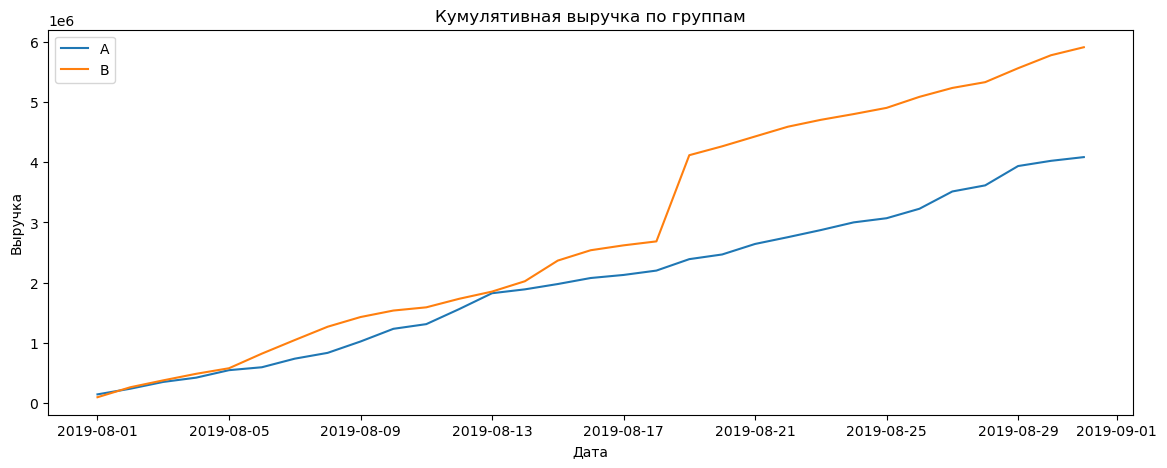

In [19]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

fig, axes = plt.subplots(1)

# график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend()

fig.set_figheight(5)
fig.set_figwidth(14);

**Вывод 1:** Практически с самого начала лидером по выручке была группа В, которая в середине намного обогналала группу А и продолжала лидировать до конца теста. Возможно на это повлияли большие заказы. Тем не менее, графики выручки обеих групп растут, а у группы В в нескольких точках заметен резкий рост. Скорее всего было повышение числа заказов или появились дорогие заказы в выборке.

**2. График кумулятивного среднего чека по группам.**

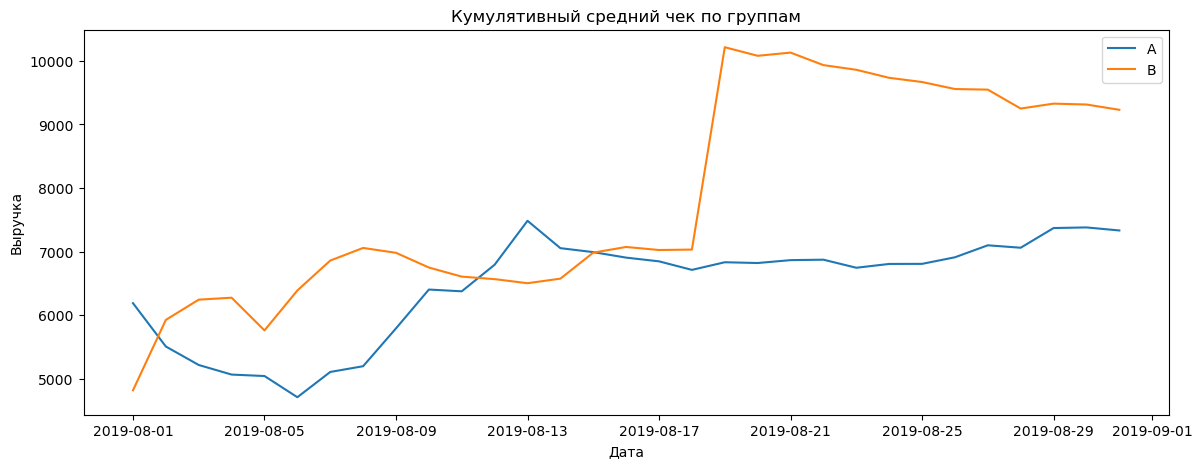

In [20]:
fig, axes = plt.subplots(1)
# график с кумулятивным средним чеком в группе А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
# график с кумулятивным средним чеком в группе В
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Кумулятивный средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend()
fig.set_figheight(5)
fig.set_figwidth(14);

**Вывод 2:** Кумулятивное значение среднего чека по группам также показывает повышение, где лидирует также группа В. На графике среднего чека выручки заметно, что в группе В в нескольких точках резко растут показатели, особенно в середине. У группы А в начале виден спад, после идет резкое повышение и где-то в середине - стабилизация. Причина искажения результатов скорее всего такая же - увеличение числа заказов или появились дорогие заказы в выборке.

**3. График относительного изменения кумулятивного среднего чека группы B к группе A.**

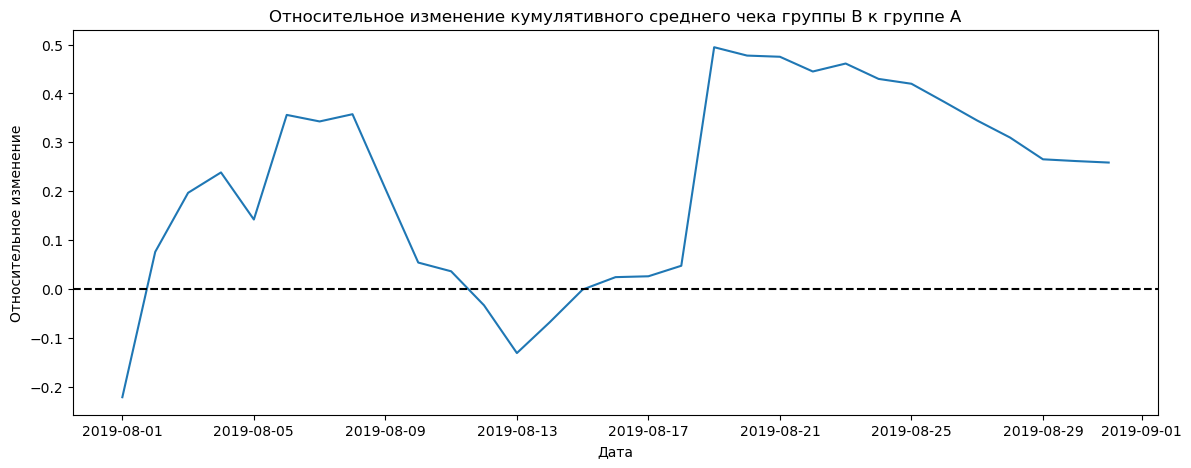

In [21]:
# собрала данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
fig, axes = plt.subplots(1)
# поcтроила отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавила ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное изменение кумулятивного среднего чека группы В к группе А')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
fig.set_figheight(5)
fig.set_figwidth(14);

**Вывод 3:** График относительного различия кумулятивного среднего чека между группами показывает, что результаты теста менялись в несколько дат, но особенно выделяется период перед серединой, где произошло резкое и значительное снижение и после повышение. Скорее всего в этот период были совершены аномальные заказы.

**4. График кумулятивного среднего количества заказов на посетителя по группам.** 

In [22]:
# подсчет кумулятивной конверсии
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeData

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
1,2019-08-01,B,21,20,101217,713,0.029453
2,2019-08-02,A,44,38,242401,1338,0.032885
3,2019-08-02,B,45,43,266748,1294,0.034776
4,2019-08-03,A,68,62,354874,1845,0.036856
...,...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708,0.033657
58,2019-08-30,A,545,493,4022970,18037,0.030216
59,2019-08-30,B,620,567,5774631,18198,0.034070
60,2019-08-31,A,557,503,4084803,18736,0.029729


In [23]:
# отделила данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataA.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
2,2019-08-02,A,44,38,242401,1338,0.032885
4,2019-08-03,A,68,62,354874,1845,0.036856
6,2019-08-04,A,84,77,425699,2562,0.032787
8,2019-08-05,A,109,100,549917,3318,0.032851


In [24]:
# отделила данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
cumulativeDataB.head()

,date,group,orders,buyers,revenue,visitors,conversion
1,2019-08-01,B,21,20,101217,713,0.029453
3,2019-08-02,B,45,43,266748,1294,0.034776
5,2019-08-03,B,61,59,380996,1803,0.033833
7,2019-08-04,B,78,75,489567,2573,0.030315
9,2019-08-05,B,101,98,581995,3280,0.030793


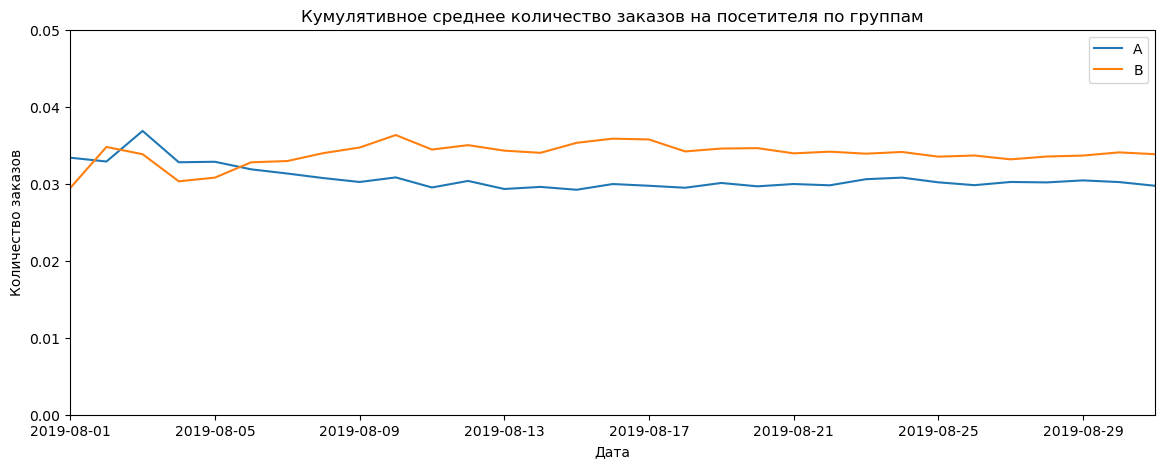

In [25]:
fig, axes = plt.subplots(1)
# построила графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend();
# задала масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0, 0.05])
plt.title('Кумулятивное среднее количество заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
fig.set_figheight(5)
fig.set_figwidth(14);

**Вывод 4:** Только в самом начале теста группа А имела выше среднего количества заказов на посетителя, но уже с первых дат группа В нарастала и опередила группу А. Показатели группы В постепенно выровнялись и зафиксировались на отсительно одном значении, которые были выше А и продержалась так до конца. Абсолютное колебание составляет примерно от 3 до 3,5%.

**5. График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.**

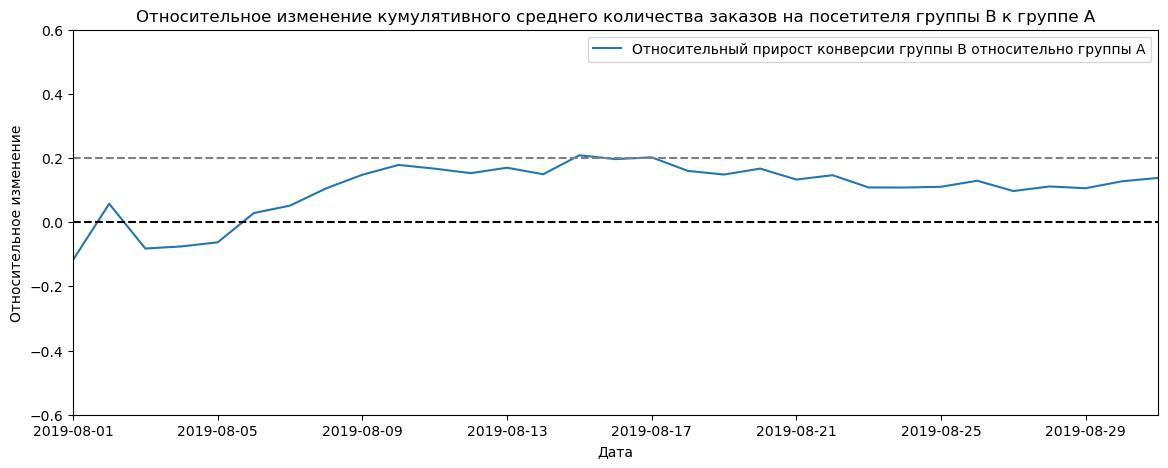

In [26]:
# собрала данные в одном датафрейме
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
fig, axes = plt.subplots(1)
#построила график относительного различия кумулятивных конверсий среднего количества заказов
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.6, 0.6])
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
fig.set_figheight(5)
fig.set_figwidth(14);

**Вывод 5:** График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A показывает, что группа В стабильно лидирует с самого начала до конца теста. Прирост составляет примерно 18% относительно группы А. 

**6. Точечный график количества заказов по пользователям.**

In [27]:
#Нашла число заказов по пользователям
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['visitorId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

       visitorId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


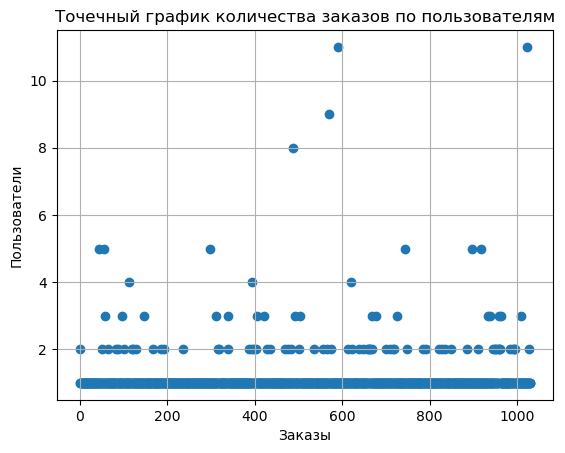

In [28]:
# Построила точечный график числа заказов на одного пользователя
x_values = pd.Series(range(0, len(ordersByUsers)))
fig, ax = plt.subplots()
ax.grid()
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Заказы')
plt.ylabel('Пользователи');

**Вывод 6:** точечный график количества заказов по пользователям показал, что много пользователей с 2-3 заказами. Заказы более 5, особенно 11 заказов вполне могут быть аномалиями.


**7. Определение аномальных пользователей по количеству заказов на пользователя.**

In [29]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


**Вывод 7:** Посчет 95-й и 99-й перцентили количества заказов на пользователя показал, что не более 5% пользователей оформляли 2 заказа и 1% пользователей заказывали 4 раза. Тем самым, границей для опредления аномальных пользователей лучше выбрать больше 4х.

**8. Точечный график стоимостей заказов.**

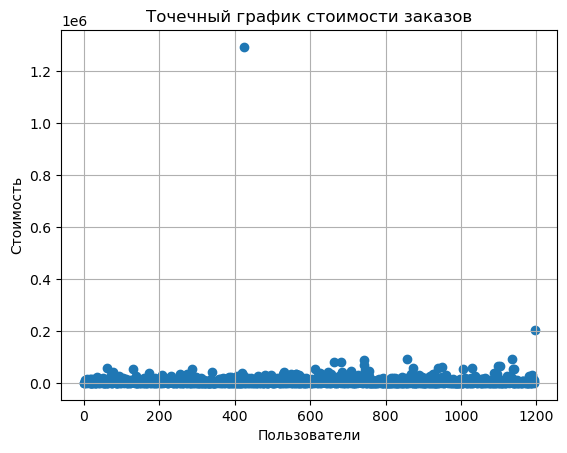

In [30]:
x_values = pd.Series(range(0,len(orders['revenue'])))
fig, ax = plt.subplots()
ax.grid()
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимости заказов')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость');

**Выводы 8:** стоимость заказов не превышает 20 000 рублей. Есть только одна аномалия в районе 120 000 рублей, которая скорее всего является выбросом. 

**9. Определение аномальных пользователей по стоимости заказов.**

In [31]:
print(np.percentile(orders['revenue'],[95,99]))

[28000.  58233.2]


**Выводы 9:** Посчет 95-й и 99-й перцентили стоимости заказов покащал, что не более 5% заказов дороже 28 000 рублей и не более 1% дороже 58 233 рублей. Таким образом, границей для опредления аномальных пользователей лучше выбрать больше 58 233 (или 59 000).

**10. Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.**

In [32]:
import scipy.stats as stats
#подготовка данных
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5)) 

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

In [33]:
#переменные с числом совершённых заказов пользователей, которые заказывали хотя бы 1 раз
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 

In [34]:
pd.Series(0, index=np.arange(visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')
[ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')]

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

      
print('p-value среднего количества заказов группы А:', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('p-value среднего количества заказов группы В:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value среднего количества заказов группы А: 0.017
p-value среднего количества заказов группы В: 0.138


**Вывод 10:** 

Нулевая гипотеза: различий в среднем количестве заказов групп A и B нет.

Альтернативная гипотеза: различия в среднем количестве заказов групп A и B есть. 

P-value равно 0.017, что меньше 0.05, поэтому нулевая гипотеза отвергается. По «сырым» данным в среднем количестве заказов между группами A и B есть статистически значимые различия. Относительный прирост среднего группы В к конверсии группы А равен 13,8%.

**11. Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.**

In [35]:
print('p-value среднего чека заказа группы А:', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('p-value среднего чека заказа группы В:', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value среднего чека заказа группы А: 0.729
p-value среднего чека заказа группы В: 0.259


**Вывод 11:**

Нулевая гипотеза: различий в среднем чеке между группами нет. 

Альтернативная гипотеза: различия в среднем чеке между группами есть. 

P-value равно 0.729, что больше 0.05, поэтому нулевая гипотеза не отвергается. По «сырым» данным различий в среднем чеке нет.

**12. Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.**

In [36]:
#очищение от аномалий данных, где аномальными пользователями будут считаться те,
#кто совершил 4 заказа и более, или совершил заказ на сумму свыше 20 000 рублей. 
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 4]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 4]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 20000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print('Всего аномальных пользователей:', abnormalUsers.shape[0]) 

568     113298937
1099    148427295
461     154576532
928     204675465
684     358944393
Name: visitorId, dtype: int64
Всего аномальных пользователей: 86


Для теста были взяты следующие гипотезы:
    
* Нулевая гипотеза: различий в среднем чеке между группами нет.

* Альтернативная гипотеза: различия в среднем чеке между группами есть. 

Поскольку при построение графиков  кумулятивного среднего чека и среднего количества заказов были заметны аномалии, была проведена очистка данных. За аномальных пользователей были приняты те, кто совершил от 4 заказов или совершил заказ на сумму свыше 20 000 рублей. Поэтому были убраны 4% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Также было подсчитано количество аномальных пользователей, которые составил 86. </font>

In [37]:
#статистическая значимость различий в среднем количестве заказов между группами теста по очищенным данным.
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print('p-value среднего количества заказов группы А (по «очищенным» данным):', '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('p-value среднего количества заказов группы В (по «очищенным» данным):', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value среднего количества заказов группы А (по «очищенным» данным): 0.023
p-value среднего количества заказов группы В (по «очищенным» данным): 0.149


**Вывод 12:**

Нулевая гипотеза: различий в среднем чеке между группами нет. 

Альтернативная гипотеза: различия в среднем чеке между группами есть. 

Аномальные пользователи были удалены с помошью статистического критерия Манна-Уитни. После удаления аномальных пользователей как и в случае с сырыми данными статистическая значимость у группы В значительно лучше группы А. P-value равно 0.023, что также как и с сырыми данными - меньше 0.05. В данном случае, нулевая гипотеза также отвергается.
</font>

**13. Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.**

In [38]:
print('p-value среднего чека заказа группы А (по «очищенным» данным):'
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('p-value среднего чека заказа группы B (по «очищенным» данным)'
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value среднего чека заказа группы А (по «очищенным» данным):0.866
p-value среднего чека заказа группы B (по «очищенным» данным)-0.002


**Вывод 13:** 
Нулевая гипотеза: различий в среднем чеке между группами нет. 

Альтернативная гипотеза: различия в среднем чеке между группами есть. 

После очистки данных от аномалий, p-value изменился, но 0.866 также является больше 0,05, значит нулевая гипотеза не отвергается. Различий в среднем чеке между группами нет.
</font>

**14. Принятие решения по результатам теста.**

Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

**Вывод:** 

* При построении графика различия конверсии между группами заметно, что результаты группы B лучше группы A и группа В стабильно лидирует с самого начала до конца теста. 
* При построении графика различия среднего чека заметны колебания, особенно выделяется период ближе к середине, где произошло резкое и значительное снижение и после повышение. Этот график показывает, что возможны аномалия в данных, поэтому точный вывод по нему не был сделан.
* Подсчет статистической значимости различий в среднем количестве заказов между группами по "сырым" и "очищенным" данным показал, что в статистически значимое различие по конверсии между группами в обоих случаях присутствует. 
* Подсчет статистически значимого различия по среднему чеку как по "сырым", так и по "очищенным" данным нет.
* Таким образом, решением по результатам теста будет остановить тест и зафиксировать победу за группой В.
</font>